# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python

   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   -- ------------------------------------- 1.0/16.1 MB 8.1 MB/s eta 0:00:02
   ------- -------------------------------- 2.9/16.1 MB 8.8 MB/s eta 0:00:02
   ---------- ----------------------------- 4.2/16.1 MB 8.4 MB/s eta 0:00:02
   ------------- -------------------------- 5.2/16.1 MB 7.2 MB/s eta 0:00:02
   --------------- ------------------------ 6.0/16.1 MB 6.5 MB/s eta 0:00:02
   --------------- ------------------------ 6.3/16.1 MB 6.0 MB/s eta 0:00:02
   ---------------- ----------------------- 6.8/16.1 MB 5.1 MB/s eta 0:00:02
   ----------------- ---------------------- 7.1/16.1 MB 4.9 MB/s eta 0:00:02
   ------------------ --------------------- 7.6/16.1 MB 4.4 MB/s eta 0:00:02
   ------------------- -------------------- 7.9/16.1 MB 4.2 MB/s eta 0:00:02
   -------------------- ------------------- 8.1/16.1 MB 3.9 MB/s eta 0:00:03
   -------------------- ------------------- 8.4/16.1 MB 3.6 MB/s eta 0:00:03
   ---

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

# Set default parameters for LaTex and font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [3]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [13]:
cursor = con.cursor()

In [14]:
query = """
SELECT MIN(hire_date) AS earliest_hire_date, MAX(hire_date) AS latest_hire_date
FROM employees;
"""
cursor.execute(query)

results = cursor.fetchall()
results

[(datetime.date(1985, 1, 1), datetime.date(2000, 1, 28))]

In [15]:
for row in results:
    print(f"Earliest Hire Date: {row[0]}, Latest Hire Date: {row[1]}")

Earliest Hire Date: 1985-01-01, Latest Hire Date: 2000-01-28


In [16]:
cursor.close()

True

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [4]:
cursor = con.cursor()

In [11]:
query_latest_salaries = """
SELECT s1.emp_no, s1.salary, s1.from_date, s1.to_date
FROM salaries s1
WHERE to_date = (
    SELECT MAX(s2.to_date)
    FROM salaries s2
    WHERE s1.emp_no = s2.emp_no
    AND (s2.to_date > s1.from_date OR s1.to_date = s2.to_date)
)
"""
cursor.execute(query_latest_salaries)

In [12]:
field_names = [i[0] for i in cursor.description]

In [13]:
res_query_latest_salaries_df = pd.DataFrame(cursor.fetchall(), columns=field_names)

In [18]:
display(res_query_latest_salaries_df.shape, res_query_latest_salaries_df.columns, res_query_latest_salaries_df.head())

(300180, 4)

Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [15]:
res_query_latest_salaries_df.dtypes

emp_no        int64
salary        int64
from_date    object
to_date      object
dtype: object

In [16]:
res_query_latest_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300180 entries, 0 to 300179
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     300180 non-null  int64 
 1   salary     300180 non-null  int64 
 2   from_date  300180 non-null  object
 3   to_date    300180 non-null  object
dtypes: int64(2), object(2)
memory usage: 9.2+ MB


In [23]:
type(res_query_latest_salaries_df['to_date'].values[0])

datetime.date

In [57]:
df_9999 = res_query_latest_salaries_df[res_query_latest_salaries_df['to_date'] == datetime.date(9999, 1, 1)]
df_not_9999_amount = res_query_latest_salaries_df.shape[0] -  df_9999.shape[0]
print(f'The number of current employees is {df_9999.shape[0]} when the total number of employees is {res_query_latest_salaries_df.shape[0]}, consequently the number of other kind of community is {df_not_9999_amount}.')

The number of current employees is 240124 when the total number of employees is 300180, consequently the number of other kind of community is 60056.


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

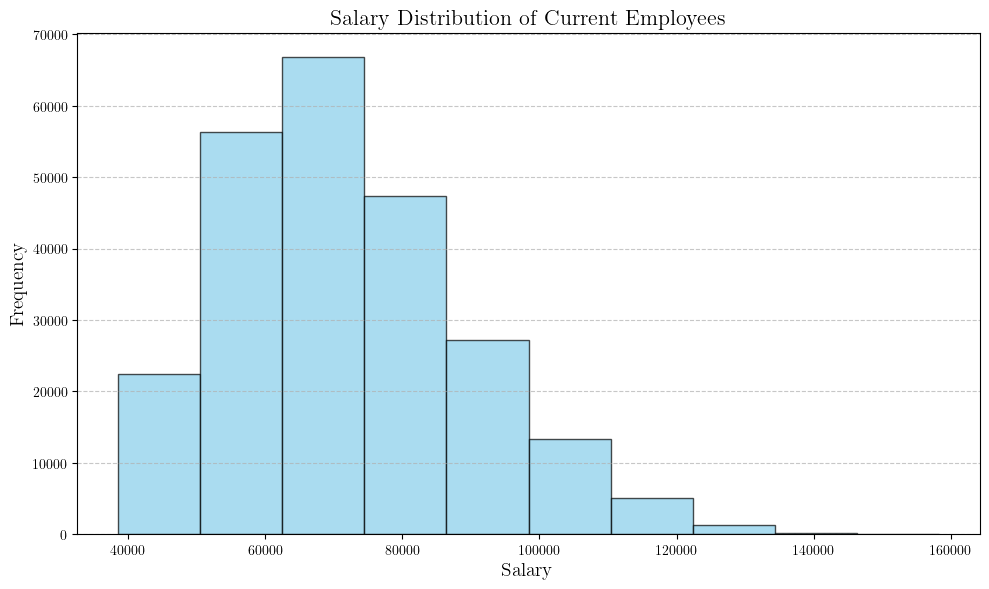

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(df_9999['salary'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Salary Distribution of Current Employees', fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show();

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [47]:
con.close()